# Random Forest
Karlee Zammit - V00823093

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

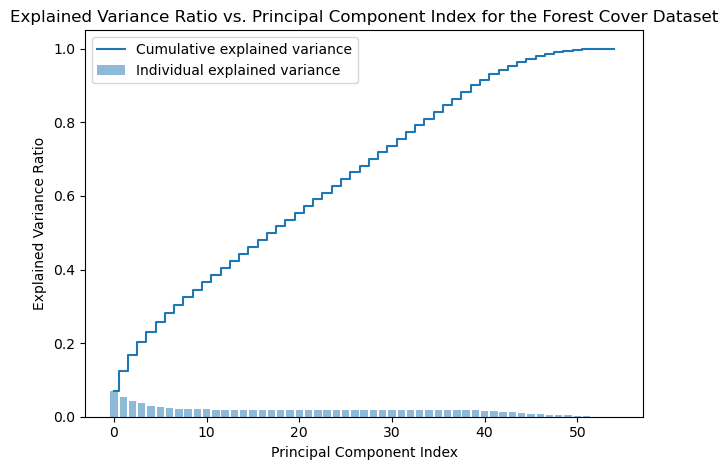

In [2]:
covtype = pd.read_csv('covtype.csv')
print(covtype.shape)
print(covtype.columns)

sc = StandardScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(covtype)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(covtype)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Forest Cover Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [3]:
# https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset
covtype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# "class" column as numpy array.
y = covtype["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = covtype.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

<class 'numpy.ndarray'>
(581012, 54)
training set ==  (435759, 54) (435759, 7) ,, validation set ==  (145253, 54) (145253, 7)


Text(0.5, 1.0, 'Area Under the Curve = 0.543')

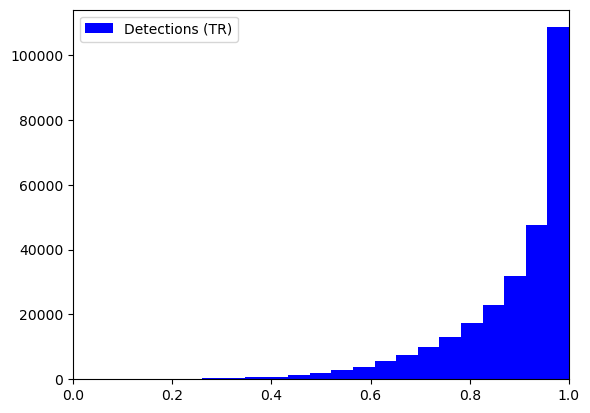

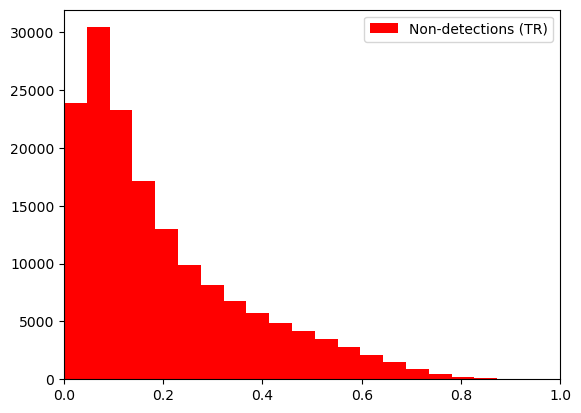

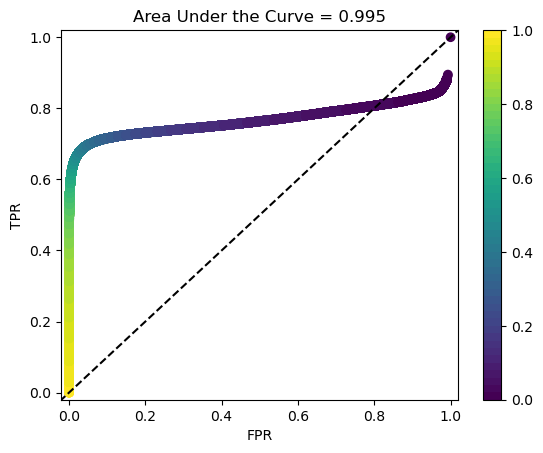

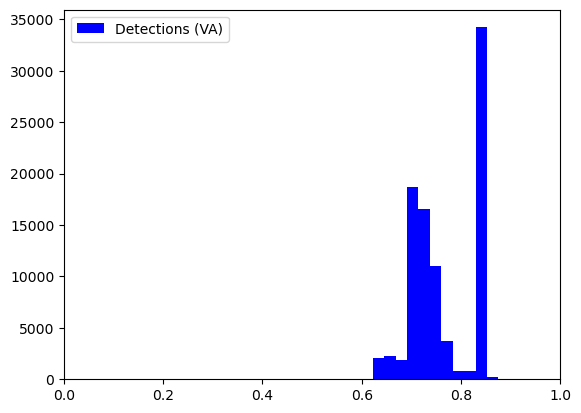

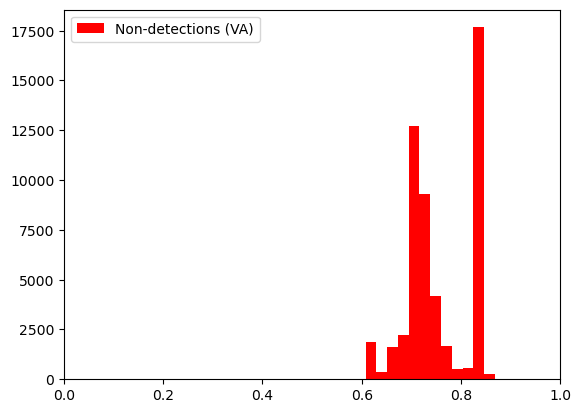

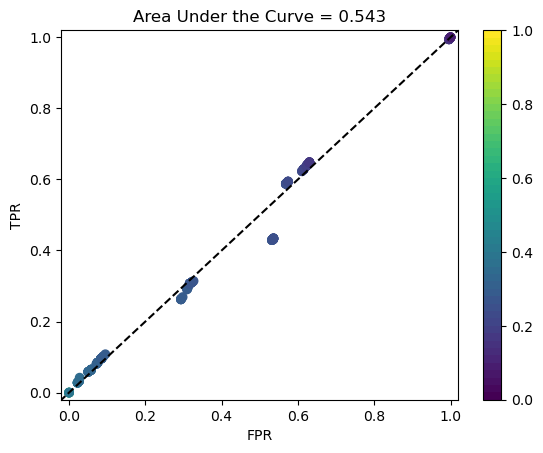

In [5]:
RFclass= RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=50, min_samples_leaf=10, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0., bootstrap=True,
                                n_jobs=None, verbose=0)
## fitting the model:
RFclass.fit(X_tr_Norm, Y_tr)

## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
PY_tr_prob = RFclass.predict_proba(X_tr_Norm)
PY_tr = RFclass.predict(X_tr_Norm)

PY_va_prob = RFclass.predict_proba(X_va)
PY_va = RFclass.predict(X_va)

####---------------------------------------------------------------------- plotting for training set
####----------------------------------------------------------------------
####----------------------------------------------------------------------
## Plot the predicted distributions for the trainig set 

plt.figure(1)
plt.hist(PY_tr_prob[0][Y_tr[:,0]==0,0],20,color = "blue",)
plt.xlim([0,1])
plt.legend(['Detections (TR)'])

plt.figure(2)
plt.hist(PY_tr_prob[0][Y_tr[:,0]==1,0],20,color = "red",)
plt.xlim([0,1])
plt.legend(['Non-detections (TR)'])

## ----------------------------------------------------------------------
## plot ROC  and estimate the are under the curve for the training set

fpr = dict()
tpr = dict()
T=dict()
roc_auc = dict()

for i in range(2):
    tpr[i], fpr[i], T[i] = roc_curve(Y_tr[:, i], PY_tr_prob[0][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
plt.figure(3)

cmap = cm.get_cmap("viridis",50)
plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
plt.colorbar()
plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
plt.xlim([-.02,1.02])
plt.ylim([-.02,1.02])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area Under the Curve = %.3f' %roc_auc[0])

####----------------------------------------------------------------------plotting for validation set
####----------------------------------------------------------------------
####----------------------------------------------------------------------
## Plot the prediccted distributions for the validation set 

plt.figure(6)
plt.hist(PY_va_prob[0][Y_va[:,0]==0,0],20,color = "blue",)
plt.xlim([0,1])
plt.legend(['Detections (VA)'])

plt.figure(7)
plt.hist(PY_va_prob[0][Y_va[:,0]==1,0],20,color = "red",)
plt.xlim([0,1])
plt.legend(['Non-detections (VA)'])

## ----------------------------------------------------------------------
## plot ROC  and estimate the are under the curve for the validation set

fpr = dict()
tpr = dict()
T=dict()
roc_auc = dict()

for i in range(2):
    tpr[i], fpr[i], T[i] = roc_curve(Y_va[:, i], PY_va_prob[0][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
plt.figure(8)
cmap = cm.get_cmap("viridis",50)
plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
plt.colorbar()
plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
plt.xlim([-.02,1.02])
plt.ylim([-.02,1.02])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area Under the Curve = %.3f' %roc_auc[0])